In [1]:
%matplotlib notebook

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matminer.featurizers.structure import XRDPowderPattern
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_zro2_del.pkl')
df

,structure,name
0,"[[1.39842671 2.40664143 4.37446042] Zr, [3.615...",Ag_ZrO2_cat_3.125_222_m.cif
1,"[[1.41037568 2.41800359 4.39765312] Zr, [3.632...",Ag_ZrO2_cat_3.125_222_o.cif
2,"[[-8.63451586 -8.02576822 -6.33664411] Zr, [-6...",Ag_ZrO2_cat_3.125_222_p-o.cif
3,"[[ 1.30468543 -7.65082882 3.77109169] Zr, [ 3...",Ag_ZrO2_cat_3.125_222_t.cif
4,"[[1.38880269 2.40992106 4.37773968] Zr, [3.657...",Ag_ZrO2_cat_6.25_122_m.cif
...,...,...
1720,"[[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...",Zr_ZrO2_inter_6.25_212_t.cif
1721,"[[ 1.25503143 -10.19349096 -3.47224897] Zr, ...",Zr_ZrO2_inter_6.25_221_m.cif
1722,"[[ -8.73042916 -10.14298992 2.09308249] Zr, ...",Zr_ZrO2_inter_6.25_221_o.cif
1723,"[[-8.87228424 9.95995753 -4.04166983] Zr, [-8...",Zr_ZrO2_inter_6.25_221_p-o.cif


In [4]:
xrd = XRDPowderPattern(two_theta_range=(5, 90))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_76,xrd_77,xrd_78,xrd_79,xrd_80,xrd_81,xrd_82,xrd_83,xrd_84,xrd_85
0,"[[1.39842671 2.40664143 4.37446042] Zr, [3.615...",Ag_ZrO2_cat_3.125_222_m.cif,1.794287e-51,4.024484e-44,2.246162e-37,3.119497e-31,1.078054e-25,9.270626e-21,1.983765e-16,1.056292e-12,...,0.001008,0.001560,0.004137,0.006113,0.005832,0.003960,0.003348,0.004651,5.433360e-03,4.726083e-03
1,"[[1.41037568 2.41800359 4.39765312] Zr, [3.632...",Ag_ZrO2_cat_3.125_222_o.cif,2.718400e-50,4.543458e-43,1.917065e-36,2.042039e-30,5.491212e-25,3.727773e-20,6.388630e-16,2.764032e-12,...,0.002589,0.004034,0.006040,0.006458,0.004396,0.003951,0.003652,0.003034,4.763075e-03,4.977037e-03
2,"[[-8.63451586 -8.02576822 -6.33664411] Zr, [-6...",Ag_ZrO2_cat_3.125_222_p-o.cif,2.092785e-64,3.689753e-55,1.136350e-46,6.113207e-39,5.744712e-32,9.429956e-26,2.703916e-20,1.354313e-15,...,0.001733,0.003938,0.004554,0.003013,0.003091,0.008713,0.006509,0.004819,6.733568e-03,4.198868e-03
3,"[[ 1.30468543 -7.65082882 3.77109169] Zr, [ 3...",Ag_ZrO2_cat_3.125_222_t.cif,4.531259e-282,1.716289e-260,8.870956e-240,6.256894e-220,6.022206e-201,7.909721e-183,1.417673e-165,3.467373e-149,...,0.003453,0.004073,0.009903,0.005524,0.002238,0.002102,0.001846,0.000552,2.676743e-05,1.804404e-07
4,"[[1.38880269 2.40992106 4.37773968] Zr, [3.657...",Ag_ZrO2_cat_6.25_122_m.cif,1.841981e-51,4.247661e-44,2.424902e-37,3.427032e-31,1.199007e-25,1.038497e-20,2.226733e-16,1.181982e-12,...,0.001100,0.001699,0.004322,0.005933,0.005214,0.003444,0.002905,0.005044,6.806981e-03,4.268745e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...",Zr_ZrO2_inter_6.25_212_t.cif,1.797397e-303,3.502642e-280,7.920616e-258,2.078421e-236,6.328774e-216,2.236233e-196,9.169082e-178,4.362607e-160,...,0.002588,0.008686,0.009555,0.002172,0.004319,0.005038,0.000740,0.000013,2.850673e-08,7.258736e-12
1721,"[[ 1.25503143 -10.19349096 -3.47224897] Zr, ...",Zr_ZrO2_inter_6.25_221_m.cif,2.626877e-07,2.286001e-05,4.781530e-04,2.410325e-03,2.933565e-03,8.963320e-04,4.776091e-04,1.177706e-03,...,0.002168,0.003183,0.004293,0.005047,0.003733,0.001584,0.002021,0.005392,4.767620e-03,1.340354e-03
1722,"[[ -8.73042916 -10.14298992 2.09308249] Zr, ...",Zr_ZrO2_inter_6.25_221_o.cif,2.630700e-07,2.338331e-05,4.951279e-04,2.499992e-03,3.012484e-03,9.052496e-04,5.353010e-04,1.346222e-03,...,0.004500,0.004699,0.004144,0.002728,0.002393,0.003200,0.003360,0.003042,1.779992e-03,7.014072e-04
1723,"[[-8.87228424 9.95995753 -4.04166983] Zr, [-8...",Zr_ZrO2_inter_6.25_221_p-o.cif,5.865126e-10,5.815656e-07,6.762273e-05,9.220599e-04,1.474342e-03,2.764456e-04,6.078463e-06,1.567294e-08,...,0.001784,0.008165,0.007832,0.001589,0.003823,0.004299,0.000617,0.000011,2.408940e-08,6.330343e-12


In [5]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_zro2.pkl')
labels_true = labels_true.labels_0_4
labels_true

0             m
1             o
2           p-o
3             t
4             m
         ...   
1720          t
1721          m
1722          o
1723    unknown
1724          t
Name: labels_0_4, Length: 1725, dtype: object

In [6]:
# labels_true = labels_true['new_labels']
# labels_true = labels_true.values
# labels_true = labels_true.astype(int)

In [7]:
labels_true = labels_true.replace({'m': 0, 'p-o': 1, 'o': 2, 't': 3, 'unknown': 4})
labels_true

0       0
1       2
2       1
3       3
4       0
       ..
1720    3
1721    0
1722    2
1723    4
1724    3
Name: labels_0_4, Length: 1725, dtype: int64

In [8]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_76,xrd_77,xrd_78,xrd_79,xrd_80,xrd_81,xrd_82,xrd_83,xrd_84,xrd_85
0,1.794287e-51,4.024484e-44,2.246162e-37,3.119497e-31,1.078054e-25,9.270626e-21,1.983765e-16,1.056292e-12,1.399555e-09,4.614332e-07,...,0.001008,0.001560,0.004137,0.006113,0.005832,0.003960,0.003348,0.004651,5.433360e-03,4.726083e-03
1,2.718400e-50,4.543458e-43,1.917065e-36,2.042039e-30,5.491212e-25,3.727773e-20,6.388630e-16,2.764032e-12,3.018946e-09,8.324241e-07,...,0.002589,0.004034,0.006040,0.006458,0.004396,0.003951,0.003652,0.003034,4.763075e-03,4.977037e-03
2,2.092785e-64,3.689753e-55,1.136350e-46,6.113207e-39,5.744712e-32,9.429956e-26,2.703916e-20,1.354313e-15,1.184914e-11,1.810910e-08,...,0.001733,0.003938,0.004554,0.003013,0.003091,0.008713,0.006509,0.004819,6.733568e-03,4.198868e-03
3,4.531259e-282,1.716289e-260,8.870956e-240,6.256894e-220,6.022206e-201,7.909721e-183,1.417673e-165,3.467373e-149,1.157275e-133,5.270915e-119,...,0.003453,0.004073,0.009903,0.005524,0.002238,0.002102,0.001846,0.000552,2.676743e-05,1.804404e-07
4,1.841981e-51,4.247661e-44,2.424902e-37,3.427032e-31,1.199007e-25,1.038497e-20,2.226733e-16,1.181982e-12,1.553221e-09,5.052837e-07,...,0.001100,0.001699,0.004322,0.005933,0.005214,0.003444,0.002905,0.005044,6.806981e-03,4.268745e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,1.797397e-303,3.502642e-280,7.920616e-258,2.078421e-236,6.328774e-216,2.236233e-196,9.169082e-178,4.362607e-160,2.408672e-143,1.543195e-127,...,0.002588,0.008686,0.009555,0.002172,0.004319,0.005038,0.000740,0.000013,2.850673e-08,7.258736e-12
1721,2.626877e-07,2.286001e-05,4.781530e-04,2.410325e-03,2.933565e-03,8.963320e-04,4.776091e-04,1.177706e-03,7.824222e-04,1.244232e-04,...,0.002168,0.003183,0.004293,0.005047,0.003733,0.001584,0.002021,0.005392,4.767620e-03,1.340354e-03
1722,2.630700e-07,2.338331e-05,4.951279e-04,2.499992e-03,3.012484e-03,9.052496e-04,5.353010e-04,1.346222e-03,8.928372e-04,1.443795e-04,...,0.004500,0.004699,0.004144,0.002728,0.002393,0.003200,0.003360,0.003042,1.779992e-03,7.014072e-04
1723,5.865126e-10,5.815656e-07,6.762273e-05,9.220599e-04,1.474342e-03,2.764456e-04,6.078463e-06,1.567294e-08,4.738921e-12,1.680278e-16,...,0.001784,0.008165,0.007832,0.001589,0.003823,0.004299,0.000617,0.000011,2.408940e-08,6.330343e-12


In [9]:
# PCA description will go down
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[1.36678801e-046, 9.61307713e-041, 5.34079379e-035, ...,
        4.78562415e-001, 4.38324767e-001, 4.54767652e-001],
       [2.07072552e-045, 1.08527225e-039, 4.55828456e-034, ...,
        3.12160621e-001, 3.84250947e-001, 4.78915759e-001],
       [1.59416734e-059, 8.81352218e-052, 2.70194704e-044, ...,
        4.95840534e-001, 5.43216288e-001, 4.04036370e-001],
       ...,
       [2.00392102e-002, 5.58545048e-002, 1.17728631e-001, ...,
        3.13046515e-001, 1.43597095e-001, 6.74929513e-002],
       [4.46772607e-005, 1.38915568e-003, 1.60789388e-002, ...,
        1.13516892e-003, 1.94336126e-006, 6.09137638e-010],
       [1.36912811e-298, 8.36676248e-277, 1.88343334e-255, ...,
        1.36415391e-003, 2.29963450e-006, 6.98440922e-010]])

In [10]:
mPCA = PCA(n_components=30)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([39.9, 62.2, 72.8, 80.7, 85.5, 88. , 89.7, 91.2, 92.1, 92.9, 93.6,
       94.1, 94.6, 95. , 95.4, 95.8, 96.1, 96.4, 96.7, 97. , 97.2, 97.4,
       97.6, 97.8, 98. , 98.1, 98.2, 98.3, 98.4, 98.5])

<IPython.core.display.Javascript object>


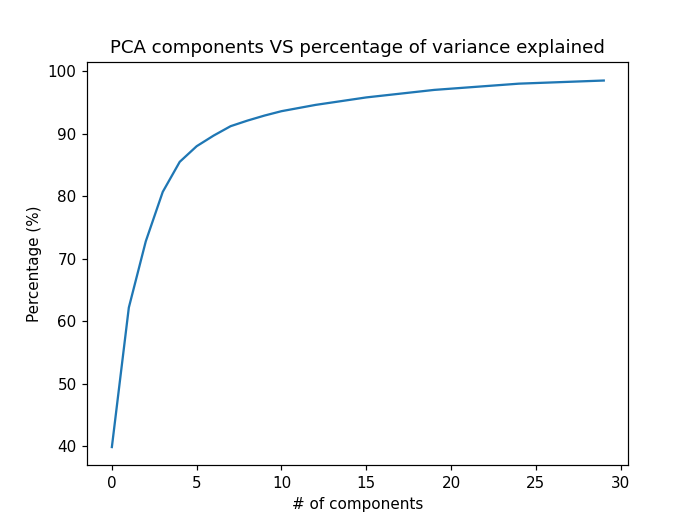

In [11]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [12]:
pca = PCA(n_components=3)
PCA = pca.fit_transform(X)

In [13]:
dfPCA = pd.DataFrame(PCA)
dfPCA['labels'] = labels_true
dfPCA.columns = ['x1','x2','x3', 'labels']
dfPCA

,x1,x2,x3,labels
0,1.442620,0.174987,-0.680313,0
1,0.814554,-0.624966,1.135909,2
2,-1.174004,1.509665,0.197997,1
3,-1.539374,-1.293385,-0.344831,3
4,1.378239,0.199042,-0.628152,0
...,...,...,...,...
1720,-1.437879,-1.179490,-0.427177,3
1721,1.433074,0.118408,-0.839443,0
1722,0.851141,-0.628975,1.078118,2
1723,-1.390557,-1.188552,-0.430144,4


In [14]:
dendo = dfPCA[['x1', 'x2']]

<IPython.core.display.Javascript object>


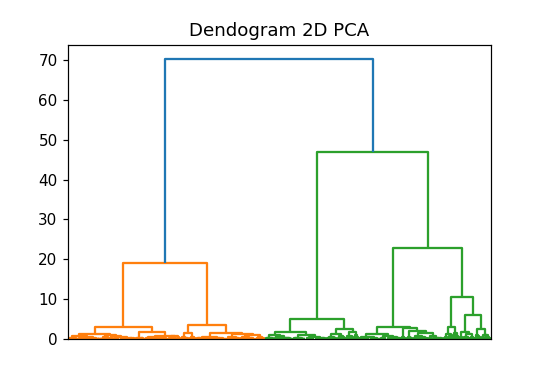

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(5, 3.5))
plt.title("Dendogram 2D PCA")
plt.xticks(color='w')
dend = shc.dendrogram(shc.linkage(dendo, method='ward'))

In [16]:
from sklearn.cluster import AgglomerativeClustering
dendo = dfPCA[['x1', 'x2', 'x3']]
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
pre_labels = cluster.fit_predict(dendo)
dfPCA['cluster'] = pre_labels

<IPython.core.display.Javascript object>


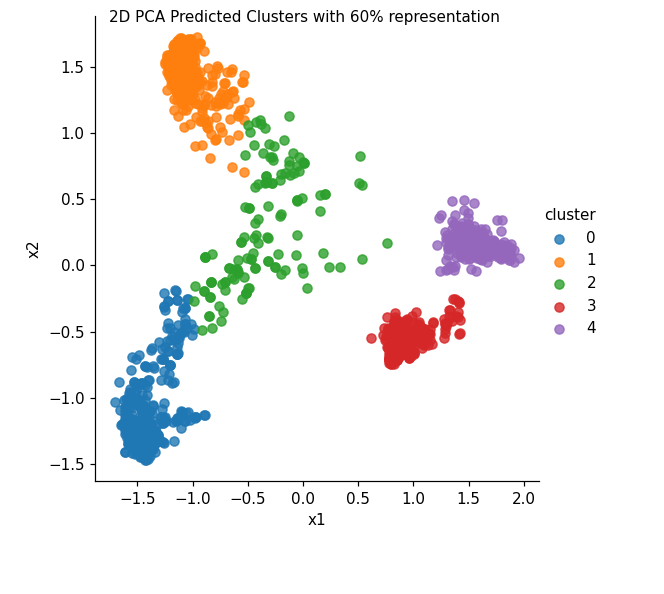

Text(0.5, 0.98, '2D PCA Predicted Clusters with 60% representation')

In [17]:
dfPCA2 = dfPCA[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dfPCA2, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters with 60% representation", fontsize=10)

<IPython.core.display.Javascript object>


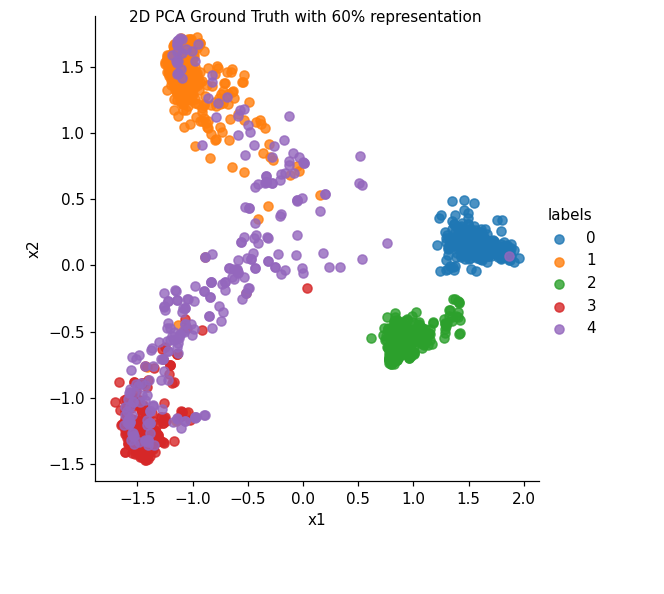

Text(0.5, 0.98, '2D PCA Ground Truth with 60% representation')

In [18]:
dfPCA2_true = dfPCA[['x1', 'x2', 'labels']]
lm = sns.lmplot(data=dfPCA2_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth with 60% representation", fontsize=10)

In [19]:
dfPCA['labels'] = dfPCA['labels'].replace({0: 'm', 1:'p-o', 2:'o', 3: 't', 4: 'unknown'})
dfPCA

,x1,x2,x3,labels,cluster
0,1.442620,0.174987,-0.680313,m,4
1,0.814554,-0.624966,1.135909,o,3
2,-1.174004,1.509665,0.197997,p-o,1
3,-1.539374,-1.293385,-0.344831,t,0
4,1.378239,0.199042,-0.628152,m,4
...,...,...,...,...,...
1720,-1.437879,-1.179490,-0.427177,t,0
1721,1.433074,0.118408,-0.839443,m,4
1722,0.851141,-0.628975,1.078118,o,3
1723,-1.390557,-1.188552,-0.430144,unknown,0


In [20]:
import plotly.express as px
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()